In [1]:
pip install prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 2.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd

# Loading the data


data_path = "/Users/sho/Downloads/1410032801_databaseLoadingData.csv"
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"File not found at {data_path}")
except Exception as e:
    print(f"An error occurred: {e}")


print(df.head())


  REF_DATE     GEO           DGUID       National Occupational Classification   
0  2021-01  Canada  2016A000011124  Production logistics co-ordinators [1523]  \
1  2021-04  Canada  2016A000011124  Production logistics co-ordinators [1523]   
2  2021-07  Canada  2016A000011124  Production logistics co-ordinators [1523]   
3  2021-10  Canada  2016A000011124  Production logistics co-ordinators [1523]   
4  2022-01  Canada  2016A000011124  Production logistics co-ordinators [1523]   

  Job vacancy characteristics     Statistics     UOM  UOM_ID SCALAR_FACTOR   
0     Type of work, all types  Job vacancies  Number     223         units  \
1     Type of work, all types  Job vacancies  Number     223         units   
2     Type of work, all types  Job vacancies  Number     223         units   
3     Type of work, all types  Job vacancies  Number     223         units   
4     Type of work, all types  Job vacancies  Number     223         units   

   SCALAR_ID      VECTOR COORDINATE  VALUE S

In [13]:
df

,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021-01,Canada,2016A000011124,Production logistics co-ordinators [1523],"Type of work, all types",Job vacancies,Number,223,units,0,v104515015,1.291.1.1,470.0,E,NaN,NaN,0
1,2021-04,Canada,2016A000011124,Production logistics co-ordinators [1523],"Type of work, all types",Job vacancies,Number,223,units,0,v104515015,1.291.1.1,565.0,C,NaN,NaN,0
2,2021-07,Canada,2016A000011124,Production logistics co-ordinators [1523],"Type of work, all types",Job vacancies,Number,223,units,0,v104515015,1.291.1.1,910.0,E,NaN,NaN,0
3,2021-10,Canada,2016A000011124,Production logistics co-ordinators [1523],"Type of work, all types",Job vacancies,Number,223,units,0,v104515015,1.291.1.1,740.0,C,NaN,NaN,0
4,2022-01,Canada,2016A000011124,Production logistics co-ordinators [1523],"Type of work, all types",Job vacancies,Number,223,units,0,v104515015,1.291.1.1,640.0,C,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64395,2022-04,Nunavut,2016A000262,"Other labourers in processing, manufacturing a...",Other recruitment strategies,Proportion of job vacancies,Percentage,242,units,0,v105774953,14.692.44.2,NaN,..,NaN,NaN,1
64396,2022-07,Nunavut,2016A000262,"Other labourers in processing, manufacturing a...",Other recruitment strategies,Proportion of job vacancies,Percentage,242,units,0,v105774953,14.692.44.2,NaN,..,NaN,NaN,1
64397,2022-10,Nunavut,2016A000262,"Other labourers in processing, manufacturing a...",Other recruitment strategies,Proportion of job vacancies,Percentage,242,units,0,v105774953,14.692.44.2,NaN,..,NaN,NaN,1
64398,2023-01,Nunavut,2016A000262,"Other labourers in processing, manufacturing a...",Other recruitment strategies,Proportion of job vacancies,Percentage,242,units,0,v105774953,14.692.44.2,NaN,..,NaN,NaN,1


In [14]:
# Converting the 'REF_DATE' column to datetime format. The 'format' argument specifies the date string format in the original series.
# If the format is not specified, pandas will try to infer it automatically, but specifying it explicitly is more efficient.
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')

# Filtering the DataFrame to only include dates from January 2021 to April 2023.
# The pandas DataFrame.query method is used here to filter the rows of the DataFrame.
# This method takes a string that specifies the condition to filter the rows.
# The condition is specified in a format similar to a SQL WHERE clause.
df = df.query("'2021-01-01' <= REF_DATE <= '2023-04-30'")

# Sorting the DataFrame by the 'REF_DATE' column.
# The sort_values method sorts a DataFrame in ascending or descending order of passed column.
# If the 'inplace' argument is set to True, the sorting will be done in place i.e. the original DataFrame is changed, otherwise a new sorted DataFrame is returned.
df.sort_values('REF_DATE', inplace=True)

# Printing the first few rows of the DataFrame to verify the operations.
print(df.head())

        REF_DATE                        GEO           DGUID   
0     2021-01-01                     Canada  2016A000011124  \
37450 2021-01-01               Saskatchewan     2016A000247   
37440 2021-01-01               Saskatchewan     2016A000247   
8930  2021-01-01  Newfoundland and Labrador     2016A000210   
37430 2021-01-01               Saskatchewan     2016A000247   

                    National Occupational Classification   
0              Production logistics co-ordinators [1523]  \
37450          Production logistics co-ordinators [1523]   
37440          Production logistics co-ordinators [1523]   
8930   Other labourers in processing, manufacturing a...   
37430          Production logistics co-ordinators [1523]   

                 Job vacancy characteristics                   Statistics   
0                    Type of work, all types                Job vacancies  \
37450                        90 days or more  Average offered hourly wage   
37440                        

In [16]:
# Extracting unique values from 'Job vacancy characteristics' column for further analysis
job_vacancy_characteristics_unique = df['Job vacancy characteristics'].unique()
print("Unique values in 'Job vacancy characteristics':\n", job_vacancy_characteristics_unique)

# Extracting unique values from 'Statistics' column for further analysis
statistics_unique = df['Statistics'].unique()
print("\nUnique values in 'Statistics':\n", statistics_unique)

# Extracting unique values from 'UOM' column for further analysis
uom_unique = df['UOM'].unique()
print("\nUnique values in 'UOM':\n", uom_unique)

# Extracting unique values from 'SCALAR_FACTOR' column for further analysis
scalar_factor_unique = df['SCALAR_FACTOR'].unique()
print("\nUnique values in 'SCALAR_FACTOR':\n", scalar_factor_unique)

Unique values in 'Job vacancy characteristics':
 ['Type of work, all types' '90 days or more'
 'Temporary (seasonal and non-seasonal)' '60 to 89 days' '90 to 119 days'
 '30 to 59 days' 'Permanent' 'Seasonal' '15 to 29 days'
 "Bachelor's degree" 'Type of position, all types' 'Constantly recruiting'
 'Continuity of recruitment, all categories' '120 days or more'
 '3 years to less than 5 years'
 'Posting a "help-wanted" sign on the storefront of the location'
 '1 year to less than 3 years' '5 years to less than 8 years'
 'Company website' 'Less than 1 year' 'Online job boards'
 'Less than 15 days' 'Recruitment strategies, all types'
 'Duration of job vacancy, all durations'
 'Personal contacts, referrals, informal networks' '8 years or more'
 'Minimum experience level sought, all levels' 'Newspaper ads'
 'Professional networking, headhunters or employment agency'
 'Government employment centre or website'
 'Job or recruitment fairs at schools, colleges or universities'
 'Social media' 'Ot

In [17]:
# Job Postings based on the PH Ontario job demand report:

# this is a manually generated table. Table from doc in cells below (results are identical)

# Given the provided job postings data from the user for NOC 7452 from Jan 2021 to Jun 2023, let's convert it into a DataFrame
job_postings_data = {
    "Date": pd.date_range(start="2021-01-01", end="2023-06-01", freq="MS"),  # Monthly start date from Jan 2021 to Jun 2023
    "NOC": "7452",
    "NOC Name": "Material handlers",
    "Skill Level": "C",
    "Posting Count": [
        1020, 1236, 1535, 1878, 2635, 2988, 3391, 4013, 5598, 6604,
        4846, 3968, 3157, 3177, 3212, 3127, 3269, 2909, 2714, 2921,
        3102, 3028, 2918, 2264, 1480, 1407, 1439, 1197, 1178, 1133
    ],
    "AVG Posting Length (days)": [
        18.7, 18.2, 18.9, 18.5, 28.1, 19.3, 18.5, 19.7, 19, 17,
        21, 23, 22, 23, 18, 19, 21, 22, 22, 21,
        20, 22, 24, 34, 25, 22, 21, 23, 28, 21
    ],
    "Median Posting Length (days)": [
        15, 15, 15, 15, 22, 22.23, 22.23, 21, 21.23, 21.23,
        21.23, 21.23, 21.23, 21.23, 20.5, 20.83, 20.83, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20
    ]
}

# Create DataFrame
job_postings_peel_halton_df = pd.DataFrame(job_postings_data)

# Display DataFrame
job_postings_peel_halton_df.head()

,Date,NOC,NOC Name,Skill Level,Posting Count,AVG Posting Length (days),Median Posting Length (days)
0,2021-01-01,7452,Material handlers,C,1020,18.7,15.0
1,2021-02-01,7452,Material handlers,C,1236,18.2,15.0
2,2021-03-01,7452,Material handlers,C,1535,18.9,15.0
3,2021-04-01,7452,Material handlers,C,1878,18.5,15.0
4,2021-05-01,7452,Material handlers,C,2635,28.1,22.0


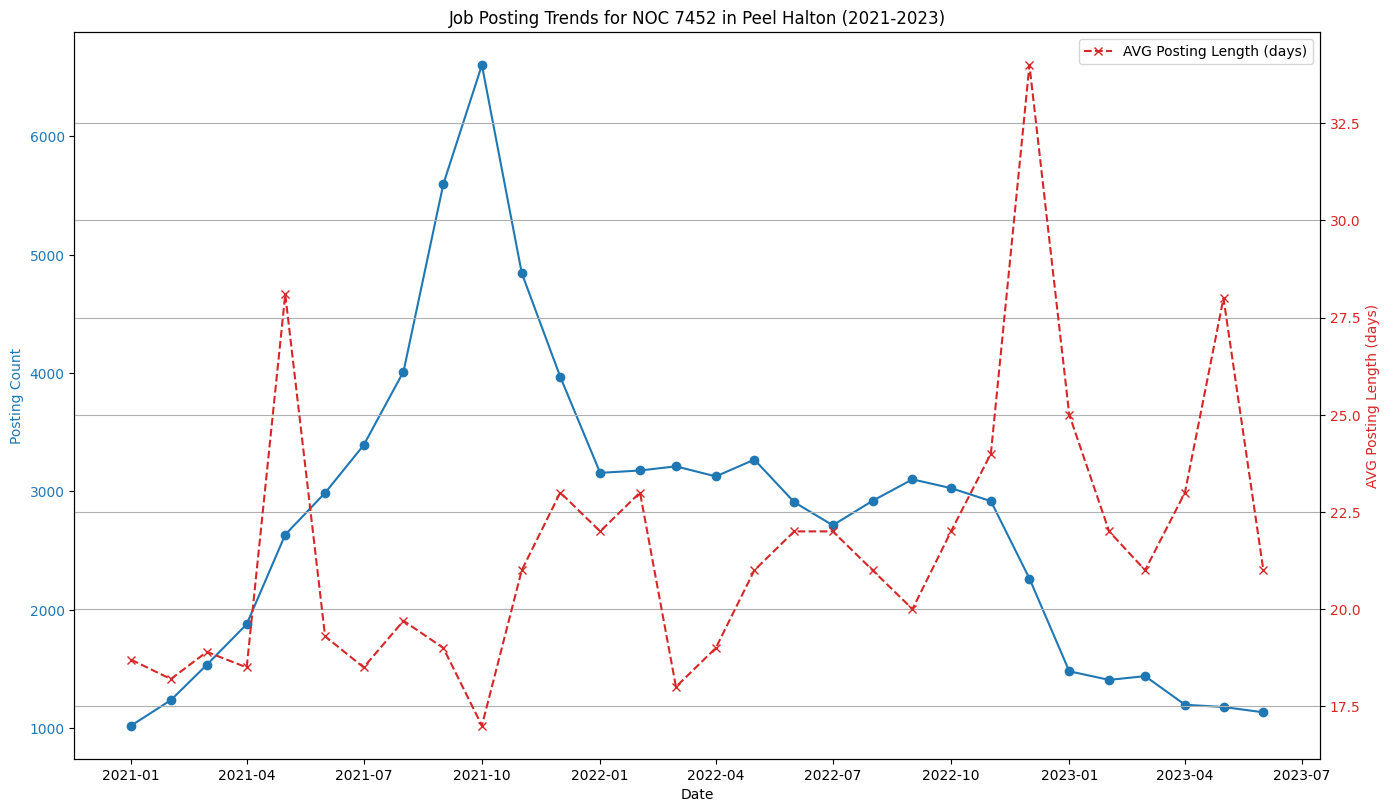

In [19]:
# Initializing a figure with a specific size
fig, ax1 = plt.subplots(figsize=(14, 8))

# Setting the color for the first y-axis
color = 'tab:blue'
# Labeling the x-axis as 'Date'
ax1.set_xlabel('Date')
# Labeling the first y-axis as 'Posting Count' and setting its color
ax1.set_ylabel('Posting Count', color=color)
# Plotting the 'Posting Count' over 'Date' with a specific color and marker
ax1.plot(job_postings_peel_halton_df['Date'], job_postings_peel_halton_df['Posting Count'], label='Posting Count', color=color, marker='o')
# Setting the color of the tick parameters for the first y-axis
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis that shares the same x-axis as the first
ax2 = ax1.twinx()
# Setting the color for the second y-axis
color = 'tab:red'
# Labeling the second y-axis as 'AVG Posting Length (days)' and setting its color
ax2.set_ylabel('AVG Posting Length (days)', color=color)
# Plotting the 'AVG Posting Length (days)' over 'Date' with a specific color, linestyle, and marker
ax2.plot(job_postings_peel_halton_df['Date'], job_postings_peel_halton_df['AVG Posting Length (days)'], label='AVG Posting Length (days)', color=color, linestyle='--', marker='x')
# Setting the color of the tick parameters for the second y-axis
ax2.tick_params(axis='y', labelcolor=color)

# Adjusting the layout to prevent overlapping
fig.tight_layout()
# Setting the title of the plot
plt.title('Job Posting Trends for NOC 7452 in Peel Halton (2021-2023)')
# Rotating the x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Adding a legend to the plot
plt.legend()
# Adding a grid to the plot
plt.grid(True)
# Displaying the plot
plt.show()

In [33]:
## Still on the Peel Halton demand report: 

# Extracting table from .docx

from docx.api import Document

# Open the DOCX file
document = Document('/Users/sho/Downloads/Untitled document (1).docx')

# Extract the table data
tables = document.tables
table_data = []

# Let's process the first table as an example
for row in tables[0].rows:
    row_data = []
    for cell in row.cells:
        row_data.append(cell.text.strip())
    table_data.append(row_data)

# Display the first few rows of the table to understand its contents
table_data[:10]  # Displaying only the first 10 rows for brevity


[['Date',
  'NOC',
  'NOC NAME',
  'SKILL LEVEL',
  'Posting Count',
  'AVG posting length (days)',
  'Median posting length (days)'],
 ['01-2021', '7452', 'Material handlers', 'C', '1020', '18.7', '15'],
 ['02-2021', '7452', 'Material handlers', 'C', '1236', '18.2', '15'],
 ['03-2021', '7452', 'Material handlers', 'C', '1535', '18.9', '15'],
 ['04-2021', '7452', 'Material handlers', 'C', '1878', '18.5', '15'],
 ['05-2021',
  '7452\n\nAnd\n\n9619',
  'Material handlers',
  'C',
  '2635\n\nAnd\n\n300',
  '28.1\n\nAnd\n\n20.8',
  '22'],
 ['06-2021',
  '7452\n\n\nAnd\n\n9619',
  'Material handlers\n\nAnd\n\nOthers labourers in processing,manufacturing and utilities',
  'C\n\n\nAnd\n\nD',
  '2988\n\n\nAnd \n\n275',
  '19.3\n\n\nAnd \n\n21.8',
  '22.23'],
 ['07-2021', '7452', 'Material handlers', 'C', '3391', '18.5', '22.23'],
 ['08-2021', '7452', 'Material handlers', 'C', '4013', '19.7', '21'],
 ['09-2021', '7452', 'Material handlers', 'C', '5598', '19', '21.23']]

In [34]:
# CON'TD: 

import numpy as np

# Since the table data includes combined rows for NOC 7452 and 9619 in some entries with '\n', we'll split these entries
def split_combined_entries(entries):
    # Split at "\n" and return clean numbers, choose the first if split, which corresponds to NOC 7452
    clean_entries = []
    for entry in entries:
        split_entry = entry.split('\n')[0]
        # Remove non-numeric characters and convert to a float or int
        numeric_entry = ''.join(filter(str.isdigit, split_entry)) or np.nan
        clean_entries.append(float(numeric_entry) if '.' in numeric_entry else int(numeric_entry))
    return clean_entries

# Process our list of lists into clean sub-lists corresponding to each column
clean_table_data = []
for row in table_data[1:]:  # Skip header row
    date, noc, noc_name, skill_level, posting_count, avg_posting_days, median_posting_days = row
    # Skip rows that do not correspond to NOC 7452
    if '7452' not in noc:
        continue
    clean_row = [
        date,
        noc.split('\n')[0],
        noc_name.split('\n')[0],
        skill_level.split('\n')[0],
        split_combined_entries([posting_count])[0],
        split_combined_entries([avg_posting_days])[0],
        split_combined_entries([median_posting_days])[0]
    ]
    clean_table_data.append(clean_row)

# Convert the clean data into a pandas DataFrame
columns = ['Date', 'NOC', 'NOC Name', 'Skill Level', 'Posting Count', 'AVG Posting Length (days)', 'Median Posting Length (days)']
job_postings_df = pd.DataFrame(clean_table_data, columns=columns)

# Ensure proper types for datetime and numerical data
job_postings_df['Date'] = pd.to_datetime(job_postings_df['Date'], format='%m-%Y')
job_postings_df['Posting Count'] = job_postings_df['Posting Count'].astype(int)
job_postings_df['AVG Posting Length (days)'] = job_postings_df['AVG Posting Length (days)'].astype(float)
job_postings_df['Median Posting Length (days)'] = job_postings_df['Median Posting Length (days)'].astype(float)

# Sort DataFrame by Date
job_postings_df.sort_values(by='Date', inplace=True)

# Display DataFrame
job_postings_df.head()

,Date,NOC,NOC Name,Skill Level,Posting Count,AVG Posting Length (days),Median Posting Length (days)
0,2021-01-01,7452,Material handlers,C,1020,187.0,15.0
1,2021-02-01,7452,Material handlers,C,1236,182.0,15.0
2,2021-03-01,7452,Material handlers,C,1535,189.0,15.0
3,2021-04-01,7452,Material handlers,C,1878,185.0,15.0
4,2021-05-01,7452,Material handlers,C,2635,281.0,22.0


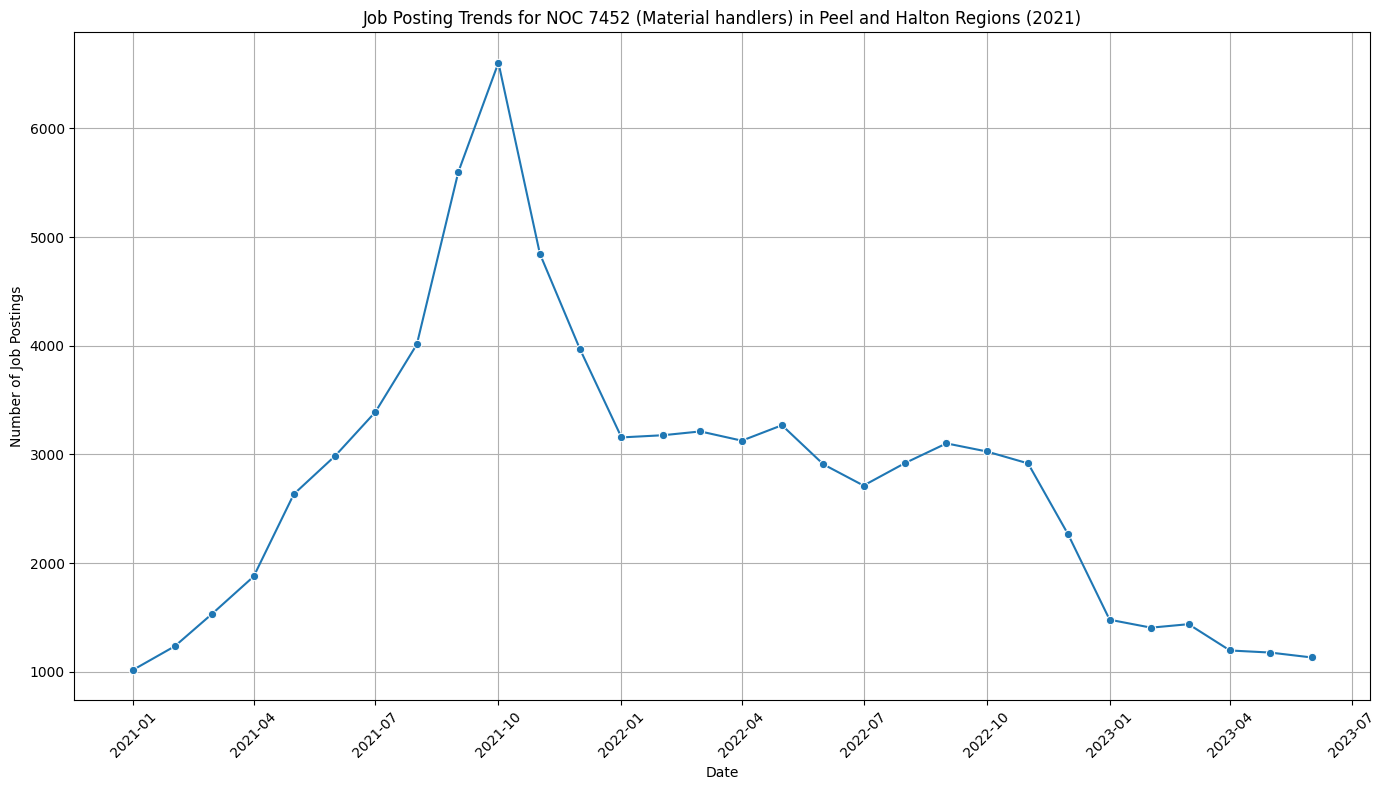

In [36]:
# Visualizing the trend of job postings for NOC 7452 over the months

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Posting Count', data=job_postings_df, marker='o')
plt.title('Job Posting Trends for NOC 7452 (Material handlers) in Peel and Halton Regions (2021)')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Above plot above illustrates two key trends for NOC 7452 (Material handlers) in the Peel Halton region from January 2021 to June 2023:

Posting Count: This represents the number of job postings per month, shown with a blue line and circles. The trend indicates fluctuations, with notable peaks suggesting periods of higher demand for material handlers.

Average Posting Length (days): This red dashed line shows the average number of days a job posting stayed active before being filled or closed. The length generally decreases when posting counts are high, which could indicate that a greater demand for labor results in faster job fulfillment.

Insights from Seasonality Trend Analysis:

Consistent Growth and Peak Periods: The trend line shows consistent growth in postings from the beginning of 2021, with a sharp increase during the mid-year months, indicating a possible seasonally induced demand peaking in the summer. A significant surge is also observed towards the end of the year, likely associated with the holiday season when warehousing and distribution activities usually ramp up to accommodate increased consumer spending.

Year-End Surge: There appears to be a marked peak towards the later months of each year, particularly noticeable in October 2021. This could be associated with the aforementioned seasonal demand in the logistics sector preparing for holiday sales and year-end distribution requirements.

Post-Peak Decline: After reaching a peak, there is a notable decline in postings, which we observe in early 2022. This decline could suggest the completion of seasonal contracts and a brief lull after the holiday rush.

Mid-Year Slump: From mid-2022 to mid-2023, a downward trend occurs, illustrating an extended period where job postings plateau or slightly decrease. Several factors could contribute to this pattern, including market saturation, shifts in industrial strategies, economic factors, or workforce transitions responding to post-pandemic recovery phases.

Implications for Traba: These seasonal trends offer Traba strategic insights into planning and forecasting workforce demand. Being cognizant of predictable peak periods allows for proactive staffing solutions. Additionally, understanding the post-peak slowdowns can inform Traba's engagement strategies with both businesses and workers to maintain activity on the platform during potential off-peak times.

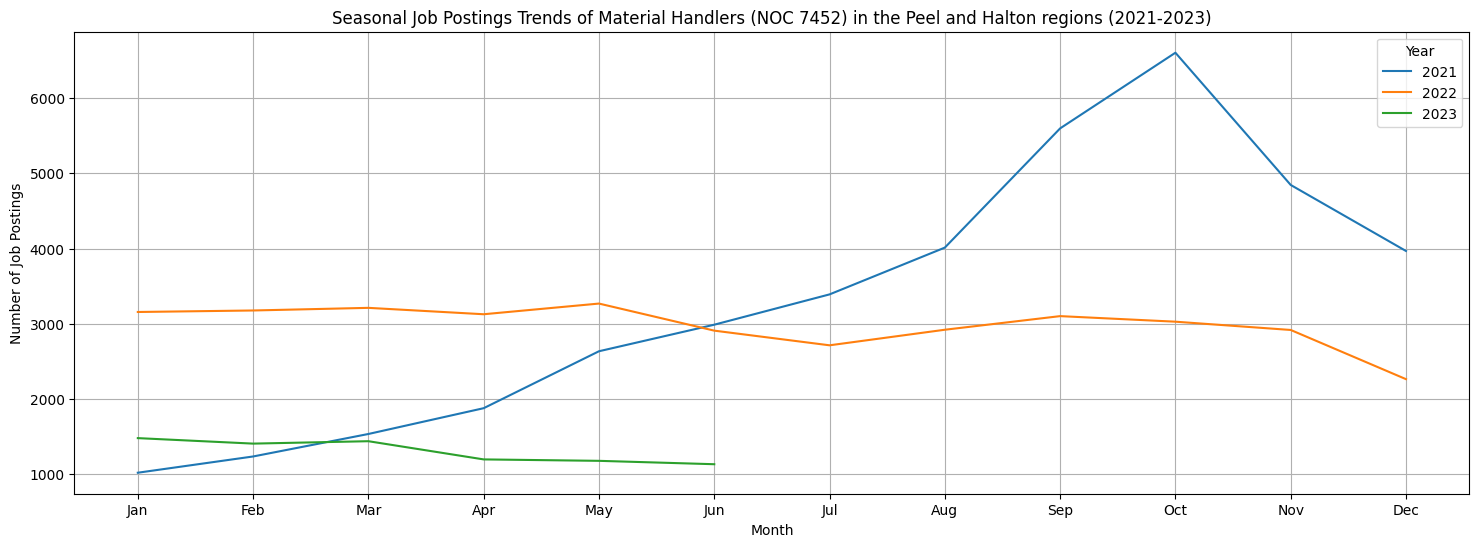

In [37]:
# Extracting year and month for seasonality analysis
job_postings_df['Year'] = job_postings_df['Date'].dt.year
job_postings_df['Month'] = job_postings_df['Date'].dt.month_name().str[:3]

# Plotting the seasonality for each year
plt.figure(figsize=(18, 6))

# 2021 postings
sns.lineplot(data=job_postings_df[job_postings_df['Year'] == 2021], x='Month', y='Posting Count', label='2021')

# 2022 postings
sns.lineplot(data=job_postings_df[job_postings_df['Year'] == 2022], x='Month', y='Posting Count', label='2022')

# 2023 postings (incomplete year data)
sns.lineplot(data=job_postings_df[job_postings_df['Year'] == 2023], x='Month', y='Posting Count', label='2023')

plt.title('Seasonal Job Postings Trends of Material Handlers (NOC 7452) in the Peel and Halton regions (2021-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.legend(title='Year')
plt.grid(True)
plt.show()

Seasonality Analysis for Each Individual Year:

2021: The year commenced with moderate activity and showed a consistent rise in job postings until a notable peak in October. This trend suggests a build-up in demand throughout the year, aligning with the industry's responses to seasonal commerce, particularly the holiday season.

2022: The data for 2022 starts higher than the previous year, indicating a potential carryover due to sustained demand or growth in economic activity. However, the trend within the year remains somewhat stable without the pronounced peaks seen in 2021. A moderate dip occurs mid-year, followed by some recovery but not to the levels of the previous year's peak.

2023: This year reveals a downward trend in postings, starting from where 2022 left off. This decline could be due to various factors, including market normalization post-pandemic or other economic shifts.

Interpretations & Insights:

A comparison of the three years showcases the variable nature of job postings within the sector, where 2021 reflected a post-pandemic surge in demand, and 2022 demonstrated stability and perhaps market correction.

The decline in 2023 alerts Traba to potential challenges in the labor market, necessitating strategic shifts in marketing, partnerships, and engagement with businesses to sustain the workforce demand.

Traba can optimize their platform's capacity and marketing efforts by anticipating peak hiring months, specifically targeting the mid-year and late-year periods where material handlers' demand is traditionally high.

This analysis reinforces the importance of adaptability and responsiveness to economic and seasonal fluctuations, ensuring Traba remains an effective and agile platform within the dynamic staffing landscape.

In [39]:
df

,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021-01-01,Canada,2016A000011124,Production logistics co-ordinators [1523],"Type of work, all types",Job vacancies,Number,223,units,0,v104515015,1.291.1.1,470.0,E,NaN,NaN,0
37450,2021-01-01,Saskatchewan,2016A000247,Production logistics co-ordinators [1523],90 days or more,Average offered hourly wage,Dollars,81,units,0,v105245850,9.291.28.5,NaN,x,NaN,NaN,2
37440,2021-01-01,Saskatchewan,2016A000247,Production logistics co-ordinators [1523],90 days or more,Proportion of job vacancies,Percentage,242,units,0,v105245849,9.291.28.2,NaN,x,NaN,NaN,1
8930,2021-01-01,Newfoundland and Labrador,2016A000210,"Other labourers in processing, manufacturing a...",Temporary (seasonal and non-seasonal),Proportion of job vacancies,Percentage,242,units,0,v104678789,2.692.32.2,61.1,E,NaN,NaN,1
37430,2021-01-01,Saskatchewan,2016A000247,Production logistics co-ordinators [1523],90 days or more,Job vacancies,Number,223,units,0,v105245848,9.291.28.1,NaN,x,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39059,2023-04-01,Saskatchewan,2016A000247,Technical sales specialists - wholesale trade ...,"Professional networking, headhunters or employ...",Proportion of job vacancies,Percentage,242,units,0,v105277175,9.465.42.2,NaN,x,NaN,NaN,1
39069,2023-04-01,Saskatchewan,2016A000247,Technical sales specialists - wholesale trade ...,Newspaper ads,Job vacancies,Number,223,units,0,v105277177,9.465.43.1,NaN,x,NaN,NaN,0
39079,2023-04-01,Saskatchewan,2016A000247,Technical sales specialists - wholesale trade ...,Newspaper ads,Proportion of job vacancies,Percentage,242,units,0,v105277178,9.465.43.2,NaN,x,NaN,NaN,1
39099,2023-04-01,Saskatchewan,2016A000247,Technical sales specialists - wholesale trade ...,Other recruitment strategies,Proportion of job vacancies,Percentage,242,units,0,v105277181,9.465.44.2,NaN,x,NaN,NaN,1


In [4]:
data = df

In [5]:
# Filter out provincial data for NOC 7452
noc_7452_data = data[data['National Occupational Classification'] == 'Material handlers [7452]']
noc_7452_provincial_data = noc_7452_data[noc_7452_data['GEO'] != 'Canada']

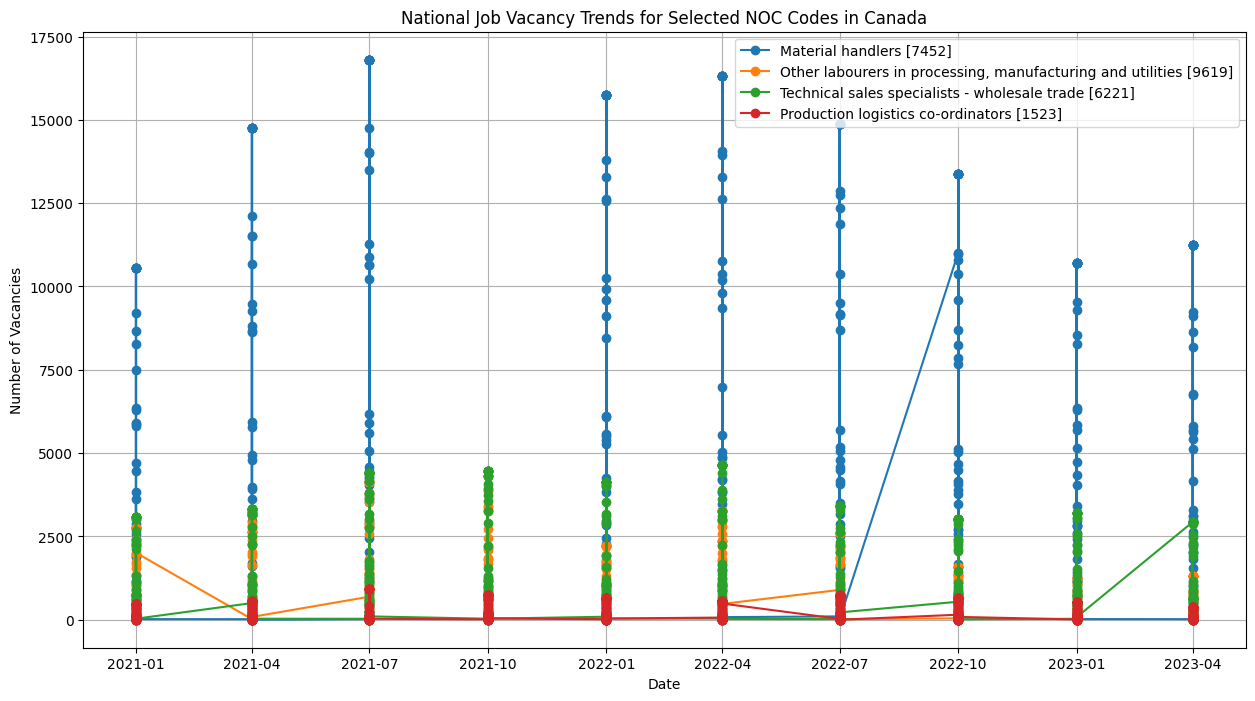

In [41]:
# Now on the to the vacancies

# Isolate the national level data for the relevant NOC codes
national_data = data[data['GEO'] == 'Canada']
noc_codes = [
    'Material handlers [7452]',
    'Other labourers in processing, manufacturing and utilities [9619]',
    'Technical sales specialists - wholesale trade [6221]',
    'Production logistics co-ordinators [1523]'
]

# Prepare the figure to plot the data
plt.figure(figsize=(15, 8))

# Loop through each NOC and plot the trends
for noc in noc_codes:
    # Get the subset of the dataframe for a given NOC code
    subset = national_data[national_data['National Occupational Classification'] == noc]
    # Plot the time series for the subset
    plt.plot(subset['REF_DATE'], subset['VALUE'], marker='o', label=noc)

# Finalize and show the figure
plt.title('National Job Vacancy Trends for Selected NOC Codes in Canada')
plt.xlabel('Date')
plt.ylabel('Number of Vacancies')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/rt/8_87sbw90rq01gwy3v7cnp780000gn/T/ipykernel_48130/2703877438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_data['REF_DATE_STR'] = national_data['REF_DATE'].dt.strftime('%Y-%m')


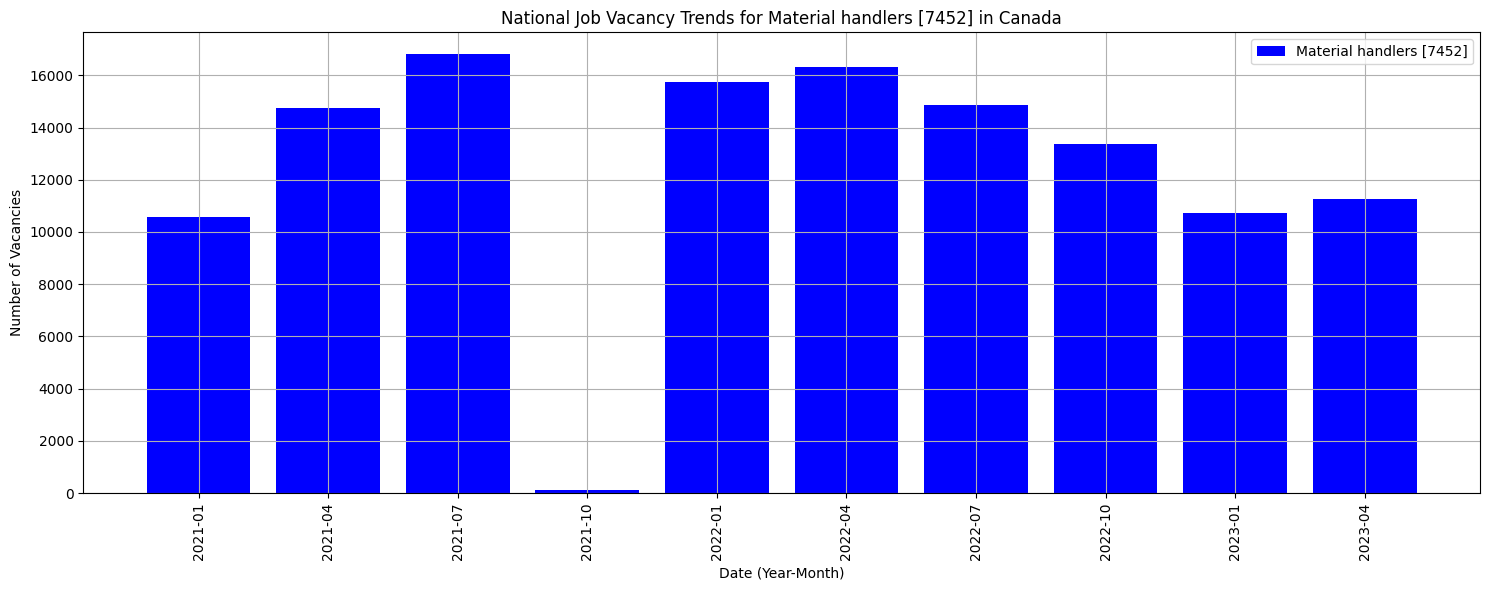

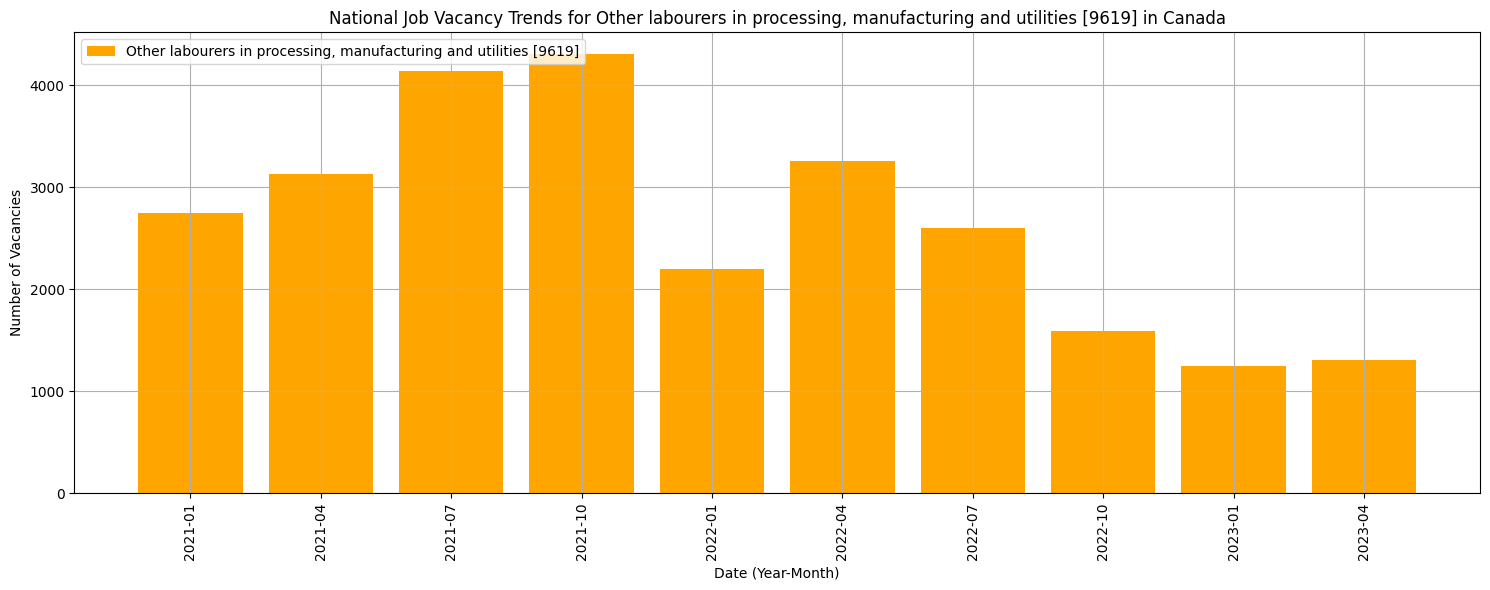

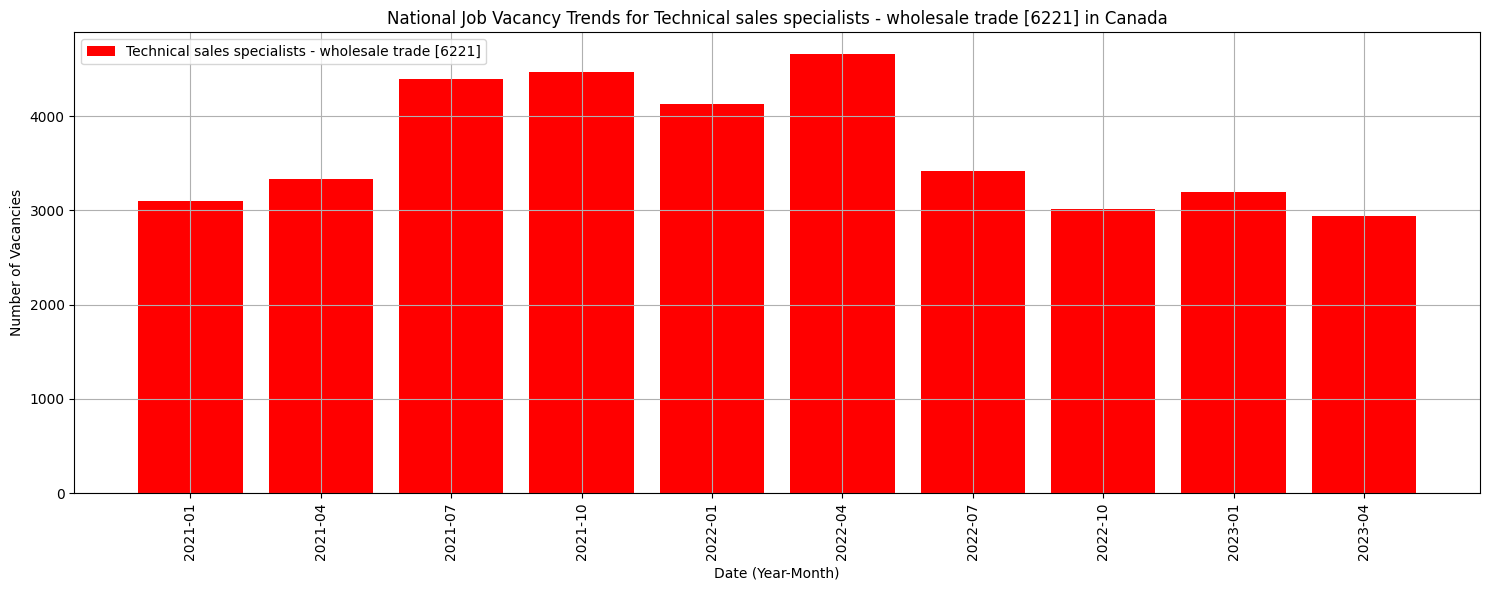

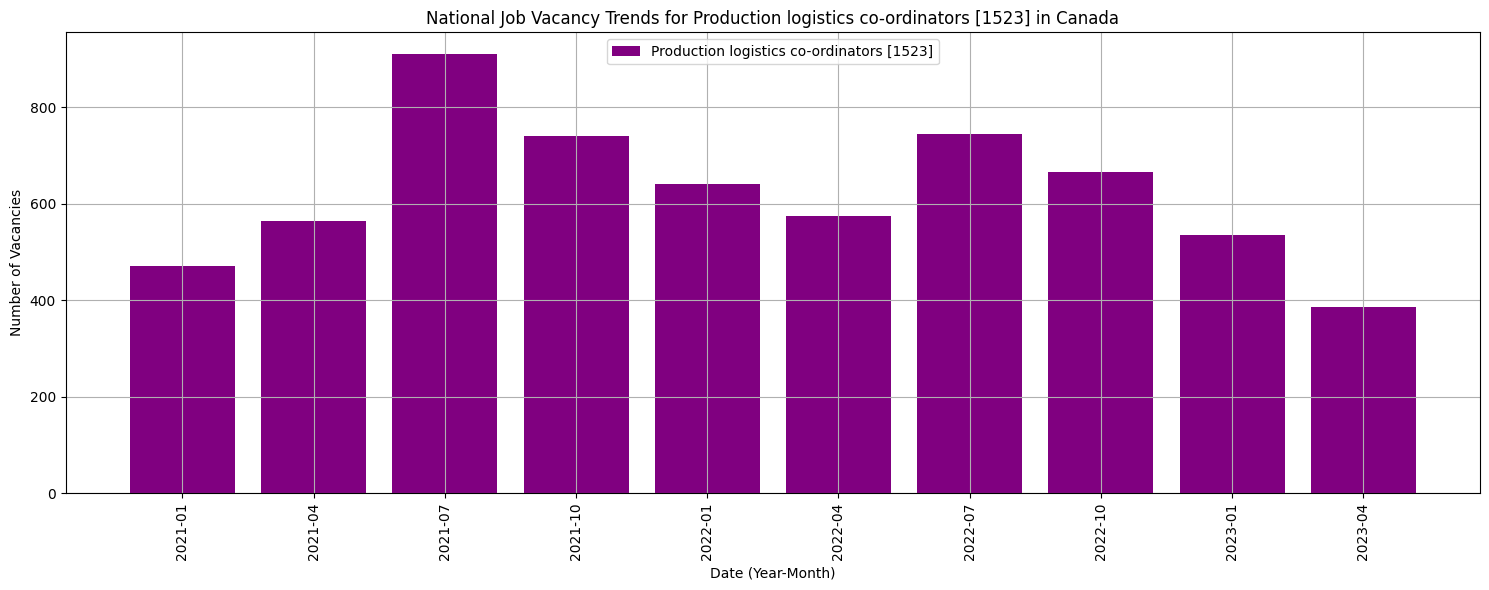

In [43]:
colors = ['blue', 'orange', 'red', 'purple']
# Convert the REF_DATE to a string with year-month format for clearer x-axis labels on the bar plots
national_data['REF_DATE_STR'] = national_data['REF_DATE'].dt.strftime('%Y-%m')

# Create a bar plot for each NOC, showing the vacancies over time in Canada
for noc, color in zip(noc_codes, colors):
    # Filter for specific NOC code
    noc_data = national_data[national_data['National Occupational Classification'] == noc]

    # Plot trends
    plt.figure(figsize=(15, 6))
    plt.bar(noc_data['REF_DATE_STR'], noc_data['VALUE'], color=color, label=noc)
    plt.title(f'National Job Vacancy Trends for {noc} in Canada')
    plt.xlabel('Date (Year-Month)')
    plt.ylabel('Number of Vacancies')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
    plt.show()

Vacancies for 7452 in Canada:

The national-level data shows fluctuations in the number of vacancies for material handlers over time. It suggests that demand for this labor category is not constant and may be affected by varying economic, seasonal, or industry-specific factors.

It is important to note that the predictive model (ARIMA, a few cells below) forecasts a downward trend that might not reflect actual future events but suggests a need for further analysis and potentially the incorporation of additional explanatory variables or different predictive models, such as SARIMA or deep learning approaches, which may capture the time series behavior more accurately.


/var/folders/rt/8_87sbw90rq01gwy3v7cnp780000gn/T/ipykernel_48130/881871802.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(provinces))
/var/folders/rt/8_87sbw90rq01gwy3v7cnp780000gn/T/ipykernel_48130/881871802.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noc_7452_data['REF_DATE_STR'] = noc_7452_data['REF_DATE'].dt.strftime('%Y-%m')


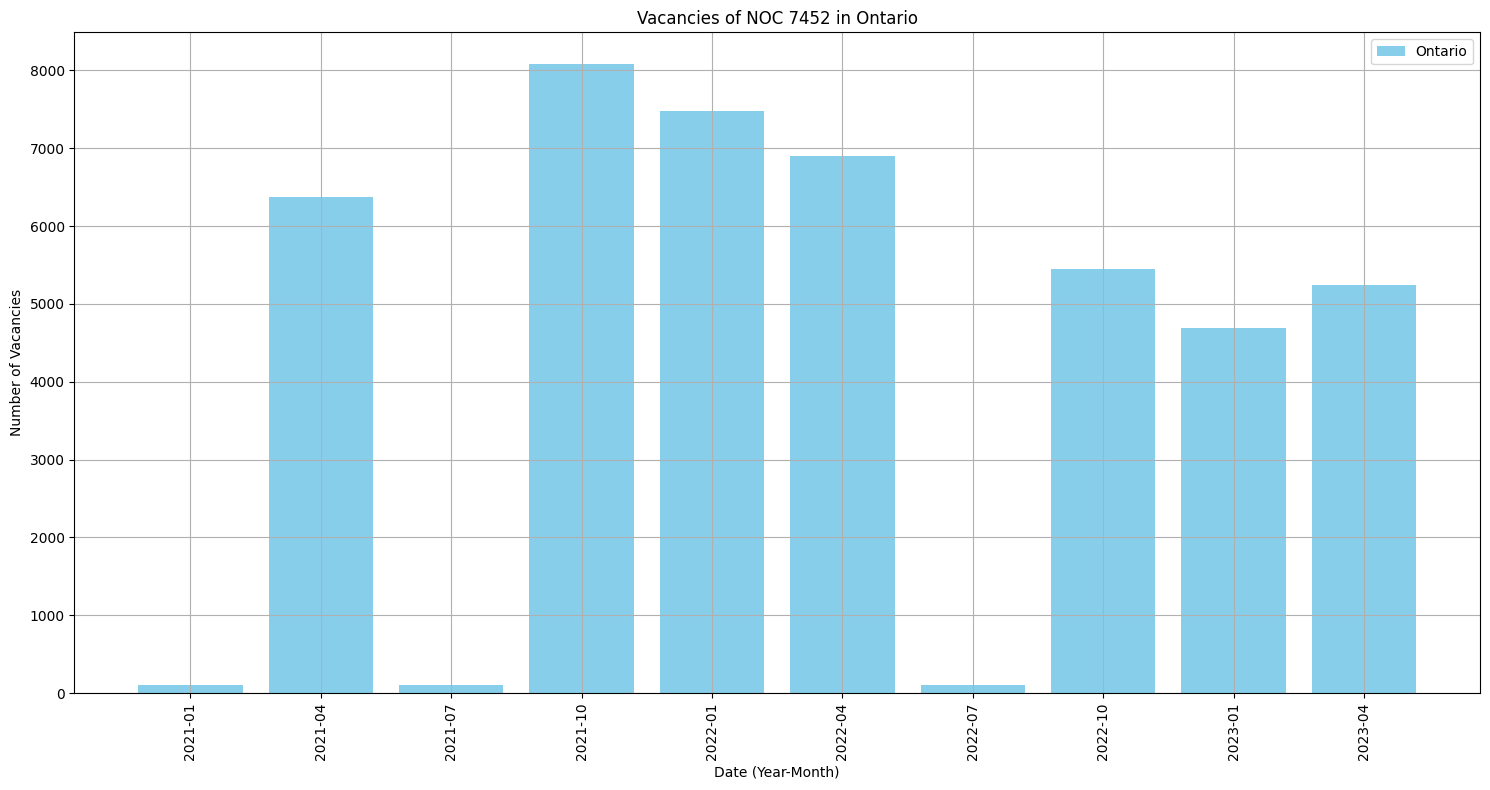

In [44]:
# Filter out provincial data for NOC 7452
noc_7452_data = data[data['National Occupational Classification'] == 'Material handlers [7452]']
noc_7452_data_not_national = noc_7452_data[noc_7452_data['GEO'] != 'Canada']

# Get the unique list of provinces for NOC 7452
provinces = noc_7452_data_not_national['GEO'].unique()

# Assign a unique color to each province using a colormap
colors = plt.cm.get_cmap('tab20', len(provinces))

# Line plot for NOC 7452 vacancies in each province over time
#plt.figure(figsize=(15, 8))
#for index, province in enumerate(provinces):
#    province_data = noc_7452_data_not_national[noc_7452_data_not_national['GEO'] == province]
#    plt.plot(province_data['REF_DATE'], province_data['VALUE'], marker='o', color=colors(index), label=province)

#plt.title('Vacancies of NOC 7452 for Each Province Over Time')
#plt.xlabel('Date')
#plt.ylabel('Number of Vacancies')
#plt.legend()
#plt.grid(True)
#plt.show()

# Bar plot for NOC 7452 vacancies in Ontario
# Convert the REF_DATE to string with year-month format for the bar plot
noc_7452_data['REF_DATE_STR'] = noc_7452_data['REF_DATE'].dt.strftime('%Y-%m')

ontario_data = noc_7452_data[(noc_7452_data['GEO'] == 'Ontario') & (noc_7452_data['National Occupational Classification'] == 'Material handlers [7452]')]

plt.figure(figsize=(15, 8))
plt.bar(ontario_data['REF_DATE_STR'], ontario_data['VALUE'], color='skyblue', label='Ontario')
plt.title('Vacancies of NOC 7452 in Ontario')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

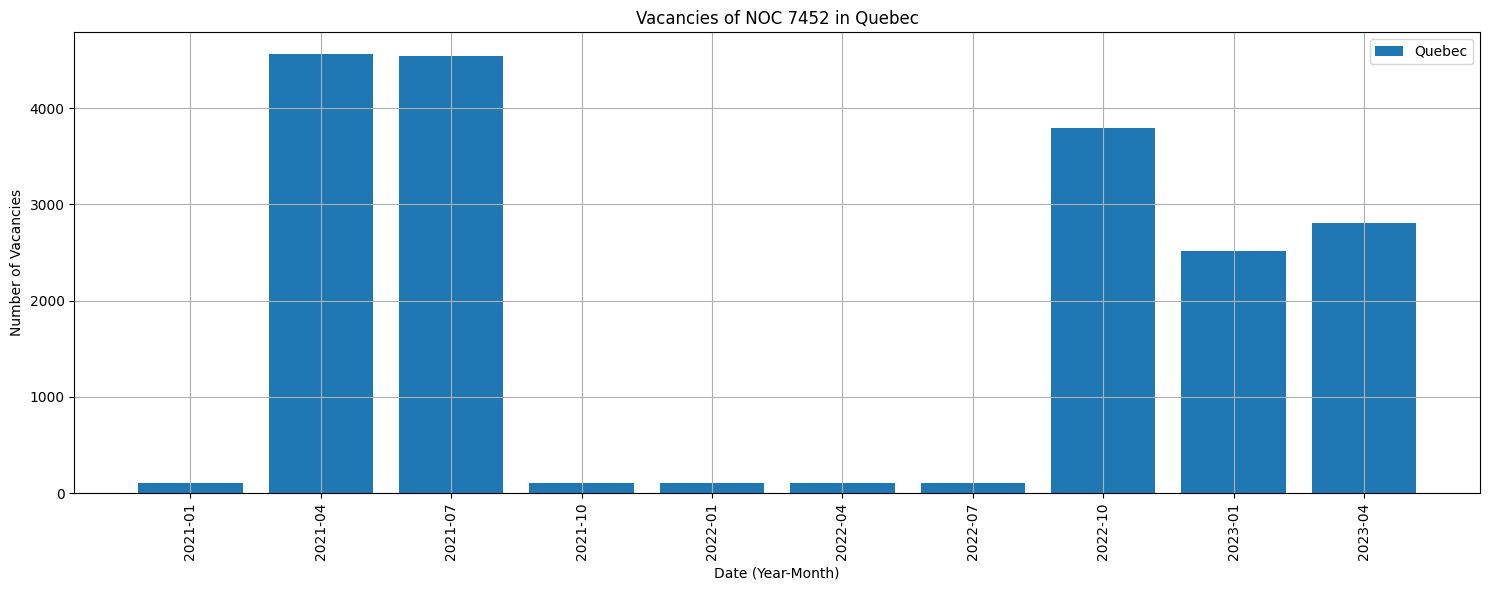

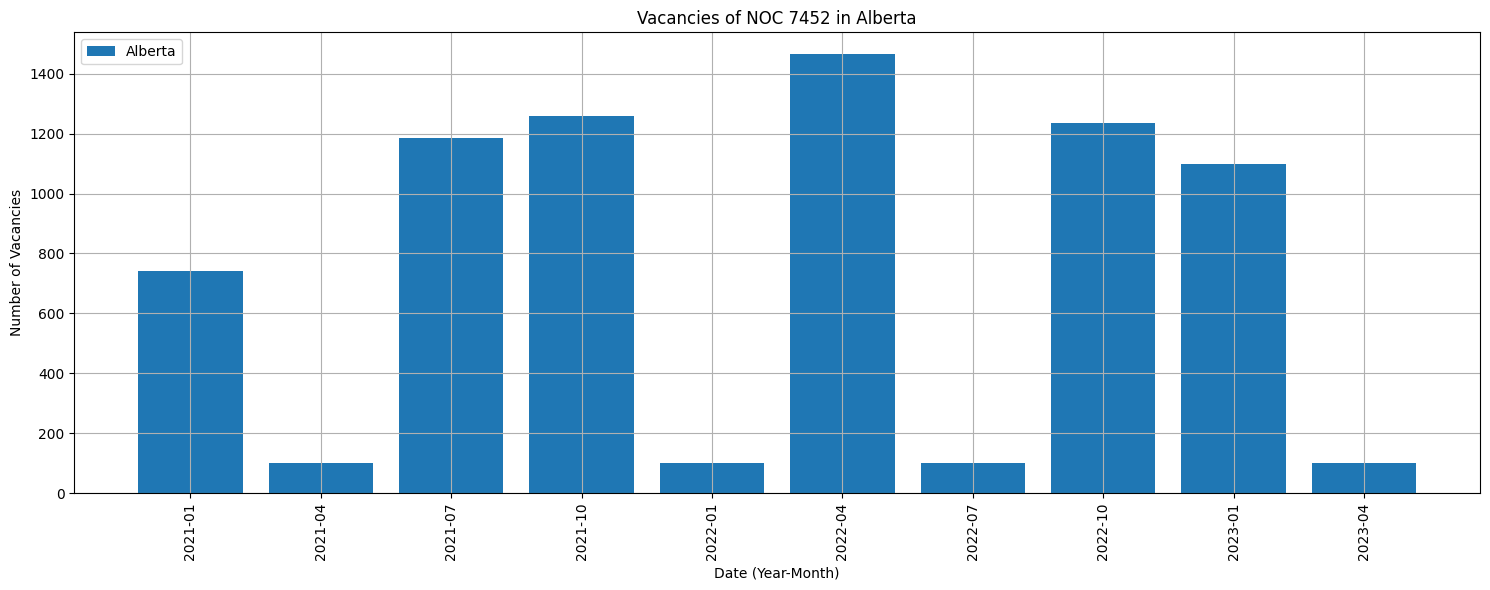

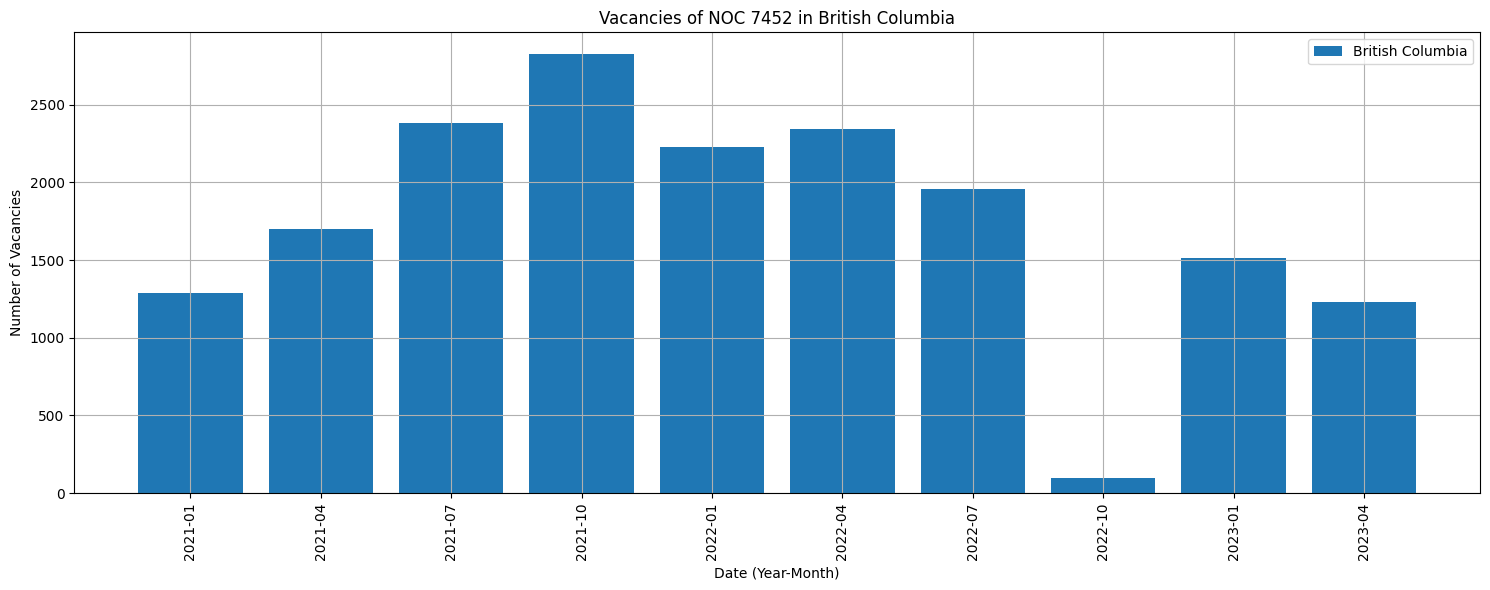

In [47]:
# List of specific provinces to plot
specific_provinces = ['Quebec', 'Alberta', 'British Columbia']

# Loop through each province and create the bar plot
for province in specific_provinces:
    # Filter for specific province data
    province_data_noc_7452 = noc_7452_provincial_data[noc_7452_provincial_data['GEO'] == province]
    
    plt.figure(figsize=(15, 6))
    plt.bar(province_data_noc_7452['REF_DATE_STR'], province_data_noc_7452['VALUE'], label=province)
    
    plt.title(f'Vacancies of NOC 7452 in {province}')
    plt.xlabel('Date (Year-Month)')
    plt.ylabel('Number of Vacancies')
    plt.xticks(rotation=90)  # Rotate x axis labels to vertical
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Vacancies for 7452 in Ontario, Quebec, Alberta, and BC:

Each province shows different trends and vacancy levels, which implies that the demand for material handlers is region-specific. Factors influencing these differences could be local economic activities, industrial presence, or provincial economic policies.
Ontario and British Columbia, in particular, showed higher average vacancy levels in the bar plots, which may indicate stronger or more fluctuating markets for warehouse and logistic-related occupations in these provinces.

Seasonal Trends of Vacancies in General, and for 7452:

Seasonal trends in job vacancies often correlate with industries' peak periods, economic cycles, and holiday seasons. For material handlers specifically, you may see increases in vacancies around periods when the logistics and distribution sectors are busier, such as holiday seasons or when companies are ramping up inventory.
A general decrease might be observed during off-peak times or when industries typically reduce production, such as after the holiday season or during industry-specific downtimes.
Insightfully, Traba could capitalize on these trends by proactively engaging with businesses prior to peak seasons to offer its services as they prepare for increased demand. During slower periods, Traba might focus on other strategies, like training or engaging with workers to strengthen its workforce capabilities.

In [2]:
# Filter out provincial data for NOC 7452
noc_7452_data = data[data['National Occupational Classification'] == 'Material handlers [7452]']
noc_7452_provincial_data = noc_7452_data[noc_7452_data['GEO'] != 'Canada']

NameError: name 'data' is not defined

In [6]:
# Same data as above but with better graphs

import plotly.express as px

# List of specific provinces to plot
specific_provinces = ['Quebec', 'Alberta', 'British Columbia']

# Loop through each province and create the bar plot
for province in specific_provinces:
    # Filter for specific province data
    province_data_noc_7452 = noc_7452_provincial_data[noc_7452_provincial_data['GEO'] == province]
    
    # Create a bar plot using Plotly
    fig = px.bar(province_data_noc_7452, 
                 x='REF_DATE_STR', 
                 y='VALUE', 
                 labels={'REF_DATE_STR': 'Date (Year-Month)', 'VALUE': 'Number of Vacancies'},
                 title=f'Vacancies of NOC 7452 in {province}',
                 color_discrete_sequence=[px.colors.qualitative.Pastel1[1]])  # Use a pastel color palette

    # Customize the layout
    fig.update_layout(
        autosize=False,
        width=800,
        height=500,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor="LightSteelBlue",  # Change the background color to a light blue
    )

    # Customize the x-axis
    fig.update_xaxes(
        dtick="M1",  # Show one tick per month
        tickformat="%b\n%Y",  # Format the date as "Month Year"
        ticklabelmode="period",  # Show the tick labels at the beginning of the period
        tickangle=45,  # Rotate the tick labels by 45 degrees
    )

    # Show the plot
    fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['REF_DATE', 'GEO', 'DGUID', 'National Occupational Classification', 'Job vacancy characteristics', 'Statistics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'] but received: REF_DATE_STR

/var/folders/rt/8_87sbw90rq01gwy3v7cnp780000gn/T/ipykernel_48130/3355865974.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  distinct_colors = plt.cm.get_cmap('tab20', len(unique_provinces))


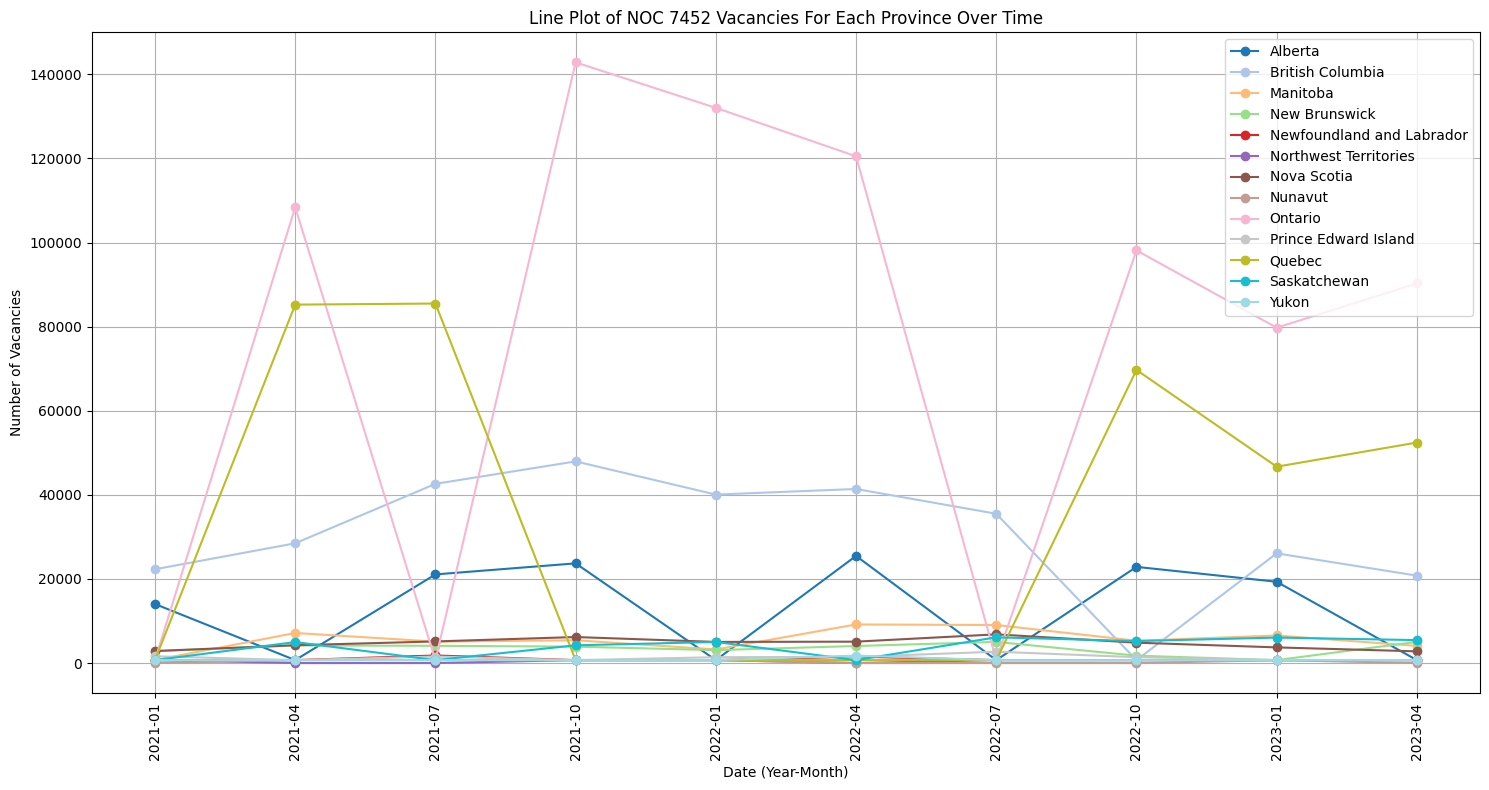

In [46]:
# We'll first ensure we're only considering non-national (provincial) data for NOC 7452.
noc_7452_provincial_data = noc_7452_data_not_national.copy()

# Convert 'REF_DATE' to a string with year-month format for clearer x-axis labels on the line plots
noc_7452_provincial_data['REF_DATE_STR'] = noc_7452_provincial_data['REF_DATE'].dt.strftime('%Y-%m')

# Group the data by province and REF_DATE to get unique monthly data points for each province
grouped_data = noc_7452_provincial_data.groupby(['GEO', 'REF_DATE_STR'])['VALUE'].sum().reset_index()

# Get a list of unique provinces
unique_provinces = grouped_data['GEO'].unique()

# Create a line plot of vacancies of NOC 7452 for each province over time
plt.figure(figsize=(15, 8))

# Define some distinct colors
distinct_colors = plt.cm.get_cmap('tab20', len(unique_provinces))

for idx, province in enumerate(unique_provinces):
    # Get the subset of the dataframe for each province
    province_subset = grouped_data[grouped_data['GEO'] == province]
    plt.plot(province_subset['REF_DATE_STR'], province_subset['VALUE'],
             marker='o', color=distinct_colors(idx), label=province)

# Improve the readability of the plot
plt.title('Line Plot of NOC 7452 Vacancies For Each Province Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Vacancies')
plt.legend()
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

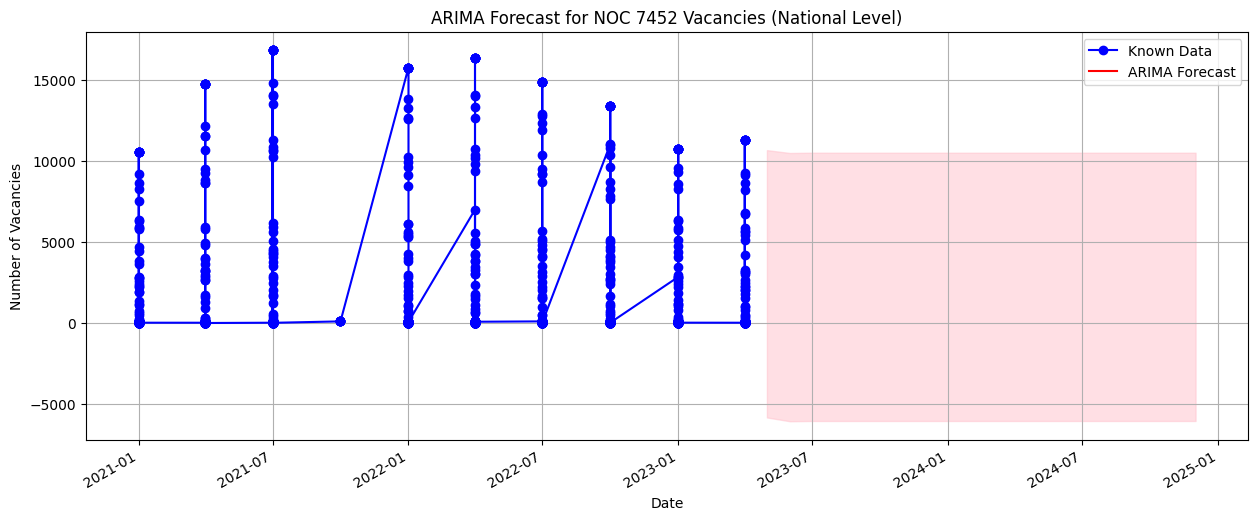

In [50]:
#ARIMA:

from statsmodels.tsa.arima.model import ARIMA

# Function to fit an ARIMA model and make predictions
def fit_arima(ts, order):
    # Fit the ARIMA model
    model = ARIMA(ts, order=order)
    results = model.fit()
    return results

# Choosing an ARIMA Order (p,d,q) can be done through AIC/BIC or manually setting based on the knowledge of the data
# For simplicity, let's assume an ARIMA(1,1,1) model which is a common starting point
arima_order = (1, 1, 1)

# Fit ARIMA model to the time series data (national level, NOC 7452)
# We need to drop any missing values as ARIMA handles only equally spaced time series without missing values
arima_results = fit_arima(national_noc_7452_data['VALUE'].dropna(), arima_order)

# Forecasting from May 2023 to the end of December 2024
arima_forecast = arima_results.get_forecast(steps=20)  # Forecast for next 20 months
forecast_index = pd.date_range('2023-05-01', periods=20, freq='MS')
forecast_series = pd.Series(arima_forecast.predicted_mean, index=forecast_index)

# Plot known data and ARIMA projections
plt.figure(figsize=(15, 6))
national_noc_7452_data['VALUE'].dropna().plot(label='Known Data', color='blue', marker='o')
forecast_series.plot(label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index, arima_forecast.conf_int().iloc[:, 0], arima_forecast.conf_int().iloc[:, 1], color='pink', alpha=0.5)
plt.title('ARIMA Forecast for NOC 7452 Vacancies (National Level)')
plt.xlabel('Date')
plt.ylabel('Number of Vacancies')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


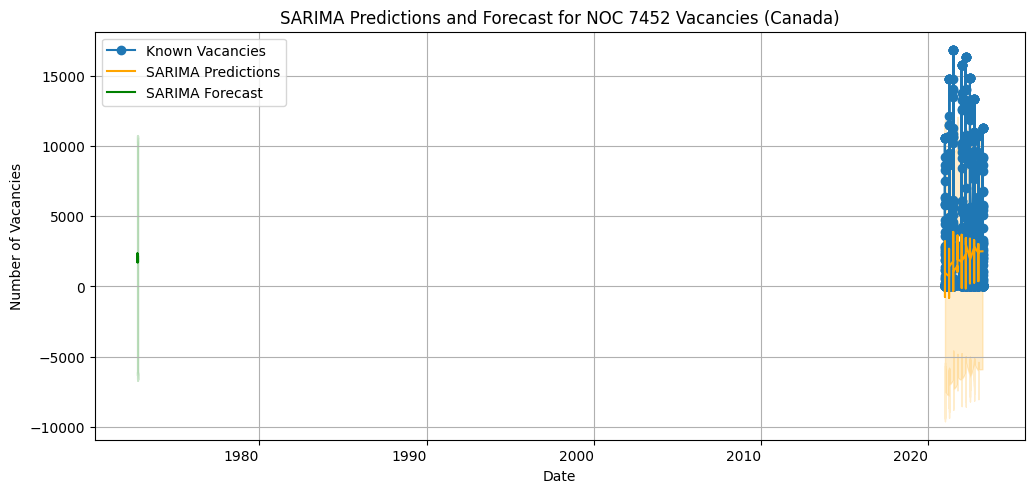

In [48]:
#SARIMA: 

import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to select the best SARIMA model order based on AIC
def best_sarima_model(df, seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in pdq]
    best_aic = float('inf')
    best_pdq = None
    best_seasonal_pdq = None
    best_model = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(df,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                results = model.fit(disp=0)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_model = results
            except:
                continue
    return best_model, best_pdq, best_seasonal_pdq

# Perform predictions
def sarima_predictions(df, start_date, end_date, seasonal_period):
    best_model, _, _ = best_sarima_model(df['VALUE'].dropna(), seasonal_period)
    
    # Predictions
    predictions = best_model.get_prediction(start=start_date, end=end_date)
    prediction_mean = predictions.predicted_mean
    prediction_ci = predictions.conf_int()
    
    # Forecast
    forecast = best_model.get_forecast(steps=24) # 24 months forecast (2 years ahead)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    return prediction_mean, prediction_ci, forecast_mean, forecast_ci, best_model

# Applying SARIMA model to predict future vacancies (NOC 7452 at the National level)
# We assume that seasonality period is monthly (frequency=12)
# Prediction from May 2023 to April 2024

national_noc_7452_data = data[(data['GEO'] == 'Canada') &
                              (data['National Occupational Classification'] == 'Material handlers [7452]')]
national_noc_7452_data = national_noc_7452_data.set_index('REF_DATE')

# Assuming monthly data, we set seasonal period to 12 (as SARIMA requires seasonal order)
prediction_mean, prediction_ci, forecast_mean, forecast_ci, _ = sarima_predictions(
    national_noc_7452_data,
    start_date='2021-01-01',
    end_date='2023-04-01',
    seasonal_period=12
)

# Plotting the known data points, predicted values, and forecasted values
plt.figure(figsize=(12, 6))

known = national_noc_7452_data['VALUE'].plot(label='Known Vacancies', marker='o')
predict = prediction_mean.plot(ax=known, label='SARIMA Predictions', color='orange')
forecast = forecast_mean.plot(ax=predict, label='SARIMA Forecast', color='green')

plt.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)

plt.title(f'SARIMA Predictions and Forecast for NOC 7452 Vacancies (Canada)')
plt.xlabel('Date')
plt.ylabel('Number of Vacancies')
plt.legend()
plt.grid(True)
plt.show()

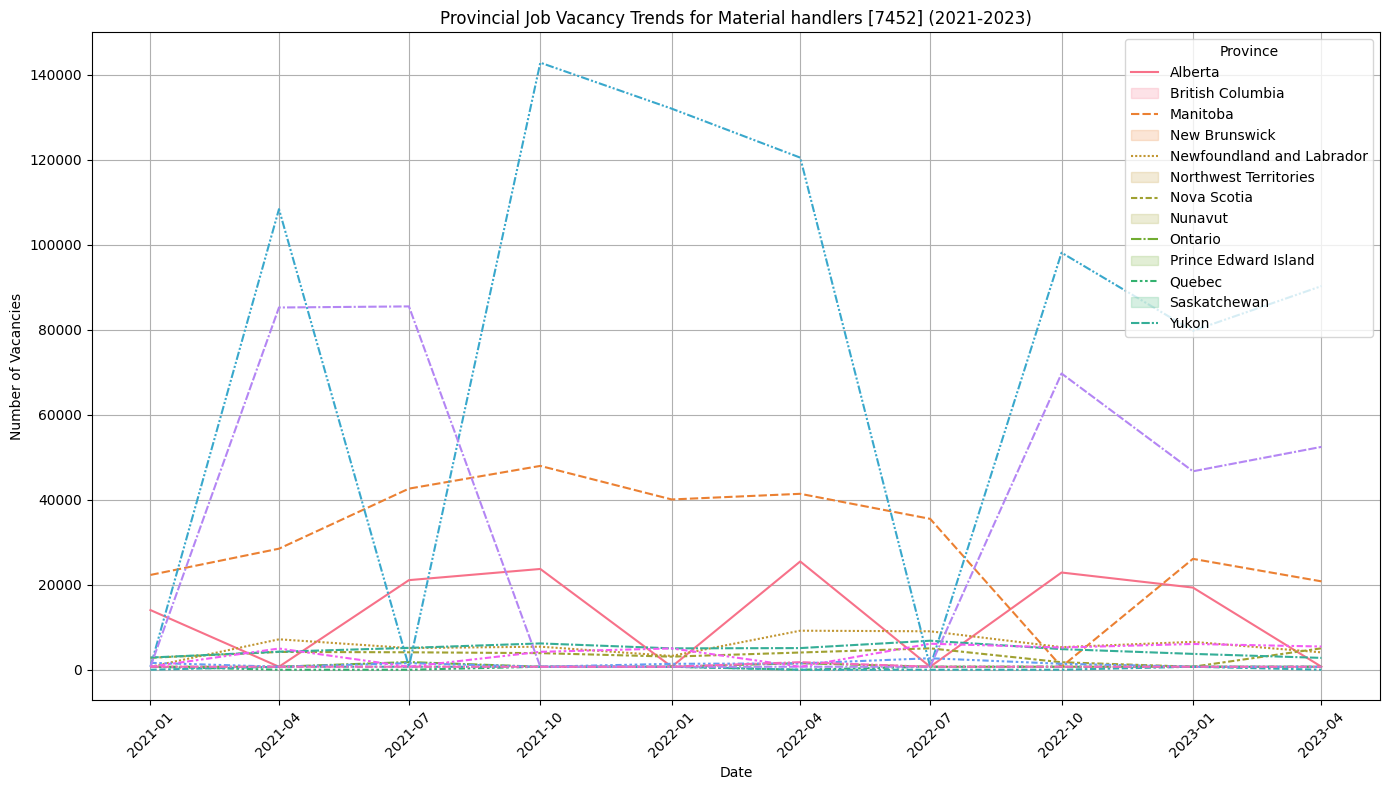

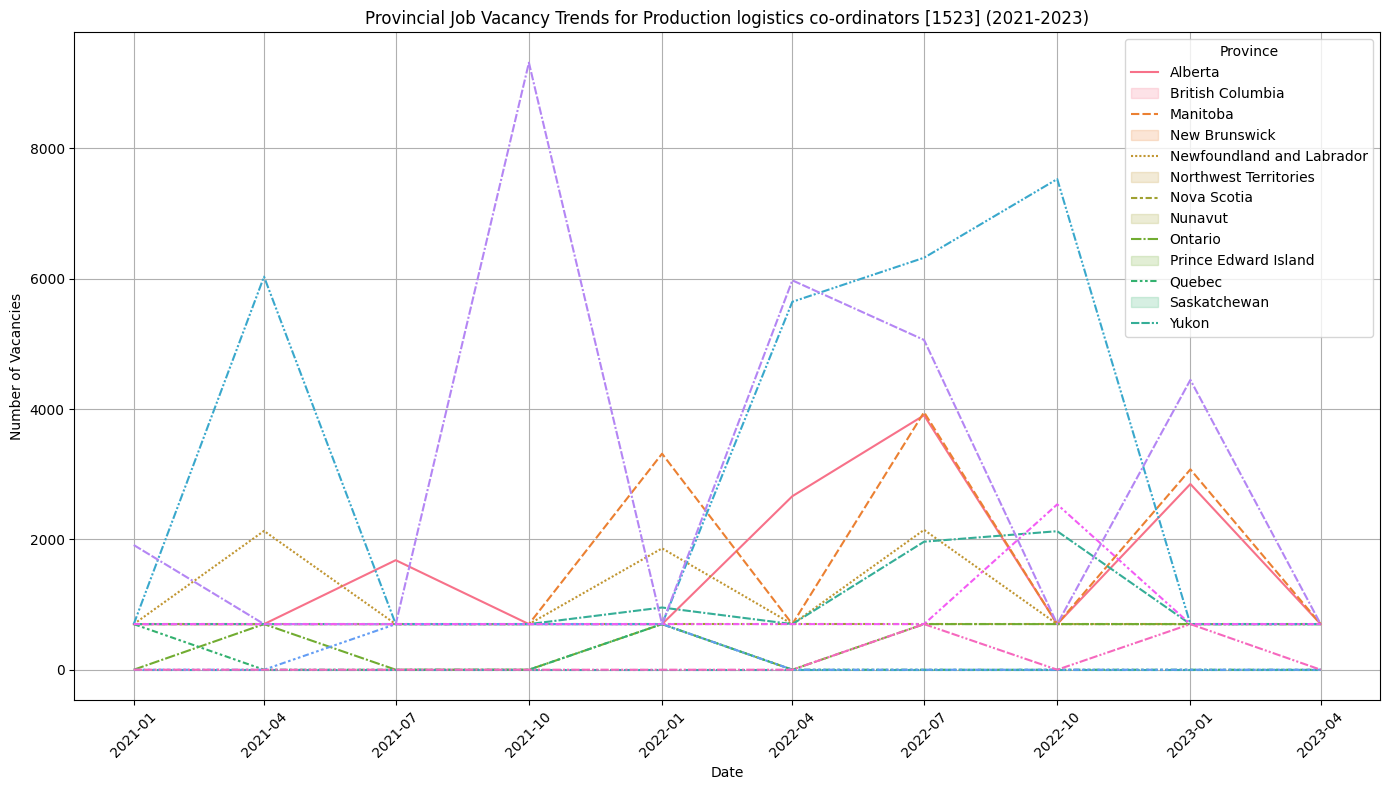

In [45]:
# VACANCIES DATASET CONT:


vacancies_data = df 

# Filter data to include only NOCs relevant to Traba (based on 2016 classification)
relevant_nocs_2016 = ['9619', '6221', '7452', '1523']
relevant_nocs_2021 = ['95109', '75101', '14402', '13201']

# Since the NOCs are mentioned in a string with their title, we'll need to include that as well to filter
relevant_nocs_2016_strings = [
    'Labourers in processing, manufacturing, and utilities [9619]',
    'Technical sales specialists, wholesale trade [6221]',
    'Material handlers [7452]',
    'Production logistics co-ordinators [1523]'
]

# Filter the dataframe
vacancies_data_filtered = vacancies_data[vacancies_data['National Occupational Classification'].isin(relevant_nocs_2016_strings)]

# We'll initially examine the aggregated trends for all Canada and then drill down to provincial trends if needed
vacancies_canada_overall = vacancies_data_filtered[vacancies_data_filtered['GEO'] == 'Canada']
vacancies_canada_overall.head()

###############################

# Filter out the national level data to focus on provincial data only
vacancies_provinces = vacancies_data_filtered[vacancies_data_filtered['GEO'] != 'Canada']

# Aggregate the provincial data by REF_DATE, GEO (province), and NOC combination, summing up the vacancies
vacancies_provinces_aggregated = vacancies_provinces.groupby(['REF_DATE', 'GEO', 'National Occupational Classification']).agg({'VALUE': 'sum'}).reset_index()

# Pivot the provincial aggregated data for visualization
pivot_vacancies_provinces = vacancies_provinces_aggregated.pivot_table(index='REF_DATE', columns=['National Occupational Classification', 'GEO'], values='VALUE')

# Let's visualize vacancies for one NOC at a time to keep the plots readable
noc_codes = pivot_vacancies_provinces.columns.get_level_values(0).unique()

# Create visualizations for provincial trends for each NOC
for noc in noc_codes:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=pivot_vacancies_provinces[noc])
    plt.title(f'Provincial Job Vacancy Trends for {noc} (2021-2023)')
    plt.xlabel('Date')
    plt.ylabel('Number of Vacancies')
    plt.xticks(rotation=45)
    plt.legend(title='Province', labels=pivot_vacancies_provinces[noc].columns)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021-01-01,Canada,2016A000011124,Production logistics co-ordinators [1523],"Type of work, all types",Job vacancies,Number,223,units,0,v104515015,1.291.1.1,470.00,E,NaN,NaN,0
690,2021-01-01,Canada,2016A000011124,Production logistics co-ordinators [1523],120 days or more,Job vacancies,Number,223,units,0,v1230892137,1.291.46.1,NaN,F,NaN,NaN,0
680,2021-01-01,Canada,2016A000011124,Production logistics co-ordinators [1523],90 to 119 days,Average offered hourly wage,Dollars,81,units,0,v1230834009,1.291.45.5,26.15,B,NaN,NaN,2
3040,2021-01-01,Canada,2016A000011124,Material handlers [7452],"Continuity of recruitment, all categories",Average offered hourly wage,Dollars,81,units,0,v1230824719,1.582.47.5,17.10,A,NaN,NaN,2
710,2021-01-01,Canada,2016A000011124,Production logistics co-ordinators [1523],120 days or more,Average offered hourly wage,Dollars,81,units,0,v1230843697,1.291.46.5,NaN,F,NaN,NaN,2


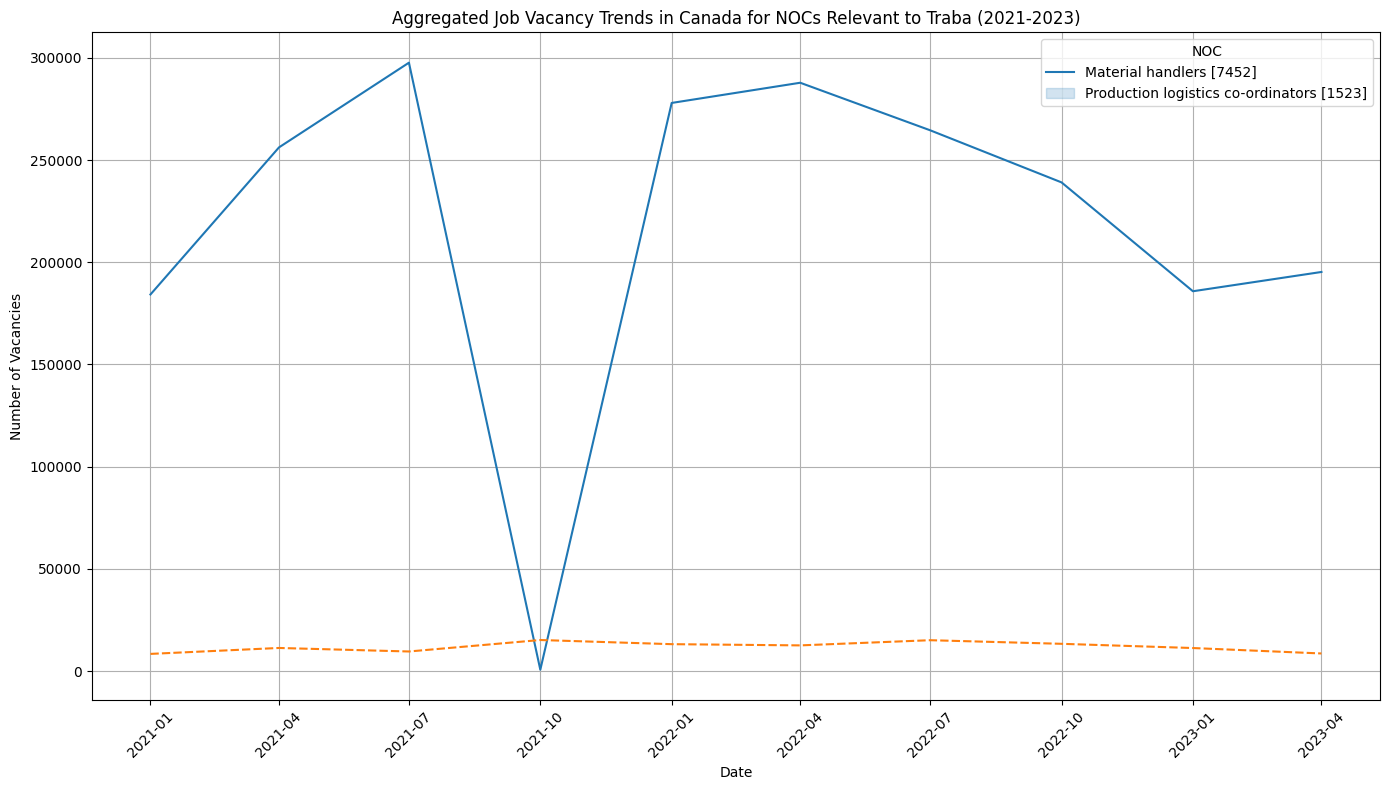

In [24]:
# VACANCIES DATASET CONTD: 

import seaborn as sns
# Aggregate the data by REF_DATE and NOC combination, summing up the vacancies
vacancies_aggregated = vacancies_canada_overall.groupby(['REF_DATE', 'National Occupational Classification']).agg({'VALUE': 'sum'}).reset_index()

# Pivot the aggregated data
pivot_vacancies_aggregated = vacancies_aggregated.pivot(index='REF_DATE', columns='National Occupational Classification', values='VALUE')

# Visualize the trends of the aggregated data
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_vacancies_aggregated)
plt.title('Aggregated Job Vacancy Trends in Canada for NOCs Relevant to Traba (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)
plt.legend(title='NOC', labels=pivot_vacancies_aggregated.columns)
plt.grid(True)
plt.tight_layout()
plt.show()

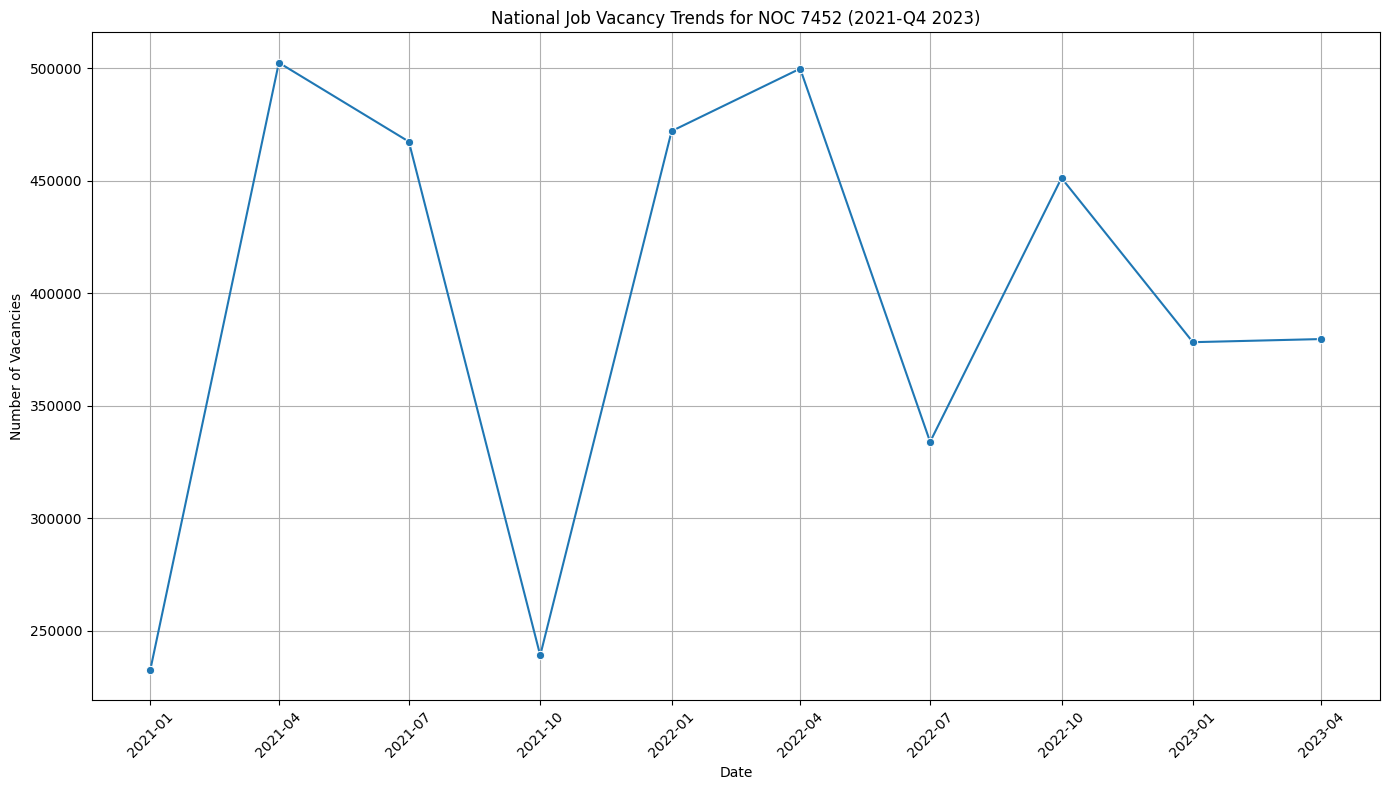

In [25]:
# THE VACANCIES DATASET CONTD:

# Filter vacancies data for NOC 7452
vacancies_noc_7452 = vacancies_data_filtered[vacancies_data_filtered['National Occupational Classification'].str.contains('7452')]

# Aggregate the data by REF_DATE and NOC 7452 and sum the vacancies
vacancies_noc_7452_aggregated = vacancies_noc_7452.groupby('REF_DATE').agg({'VALUE': 'sum'}).reset_index()

# Convert REF_DATE to datetime
vacancies_noc_7452_aggregated['REF_DATE'] = pd.to_datetime(vacancies_noc_7452_aggregated['REF_DATE'])

# Sort by REF_DATE
vacancies_noc_7452_aggregated.sort_values(by='REF_DATE', inplace=True)

# Plot the vacancy trend for NOC 7452
plt.figure(figsize=(14, 8))
sns.lineplot(data=vacancies_noc_7452_aggregated, x='REF_DATE', y='VALUE', marker='o')
plt.title('National Job Vacancy Trends for NOC 7452 (2021-Q4 2023)')
plt.xlabel('Date')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Insights from Ontario 22-24 Warehousing report:

1. Industry Employment and Growth:

Ontario's transportation and warehousing industry employed 372,900 people in 2021, making up approximately 5.1% of the workforce.
The industry saw a 4.3% employment increase in 2021, with expectations of continued growth during the 2022-2024 period, driven by e-commerce, new warehousing facilities, public sector investments in transit, and easing of public health restrictions.

2.Sector Composition:

The sector is vital for the movement of goods and supports trade.
The subsectors include truck transportation, ground passenger transportation, couriers, and others.

3.Capital Expenditure:

In 2021, capital expenditures in the sector totaled over $13.4 billion in Ontario.

4. Geographical Distribution:

The sector is geographically concentrated in Southern Ontario, notably in the Toronto Economic Region, followed by the Hamilton-Niagara Peninsula and Kitchener-Waterloo-Barrie.
Ontario accounts for more than a third of the sector's employment in Canada.

5. Workforce Characteristics:

Males significantly dominate the industry workforce.
Self-employment in the industry is relatively high at 24.1%.
The average hourly wage is above the provincial average.
The workforce tends to be older, with almost a third over 55 years old.

5.Top Occupations:

Material handlers (NOC 7452) are among the top five occupations, with 17,400 individuals employed in this field in Ontario, which is 4.7% of the sector's employment.

5.Recent History and Trends:

Employment has been on an upward trend, driven by e-commerce and the need for warehousing and storage, further accelerated by the pandemic.
Recovery is uneven across subsectors, with some like truck transportation constrained by high job vacancies.

6. Employment Outlook:

The sector will likely see robust growth up to 2024 due to increasing online shopping and e-commerce activities.

7. E-commerce and Digital Platforms:

The growth of e-commerce and the use of digital platforms is driving increased demand for transportation, warehousing, and storage employment.

8. Investments in Public Transit Infrastructure:

Significant investments in public transit infrastructure and longer-term transportation planning are being made. This will likely support demand for the movement of goods and hence, the warehousing sector.

9. Population Growth and Movement:

Overall population growth contributes to the demand for the movement of goods, underpinning the need for more transportation and warehousing services.

10. Employment Changes:

The report compares employment changes between June 2019 and June 2022 across various regions in Ontario. While there was an overall decrease in employment in the sector in Ontario, some regions like Toronto and Kitchener-Waterloo-Barrie saw increases.

11. Workforce Composition by Gender and Age:

The sector workforce consists predominantly of male employees, and a significant portion is composed of older workers, with almost a third being 55 and older.

12. Full-time Work and Self-employment:

There is a high rate of full-time employment in the sector (84.9%), and notably, self-employment constitutes 24.1% of the sector's workforce.

13. Education Levels:

The educational attainment of workers in the sector varies, with a significant number having a high school diploma or postsecondary certificate/diploma.

14.Employment Share by Region:

The Toronto region accounts for more than half (55.6%) of the sector's employment in Ontario, making it a key area for employment in this sector.
This detailed information on demographics, educational background, and regional focus areas within the transportation and warehousing sector in Ontario provides valuable insights into the workforce and market trends that Traba can use in its strategy for expansion, marketing, and recruitment in Canada, particularly in Ontario.

# Characteristics ef workers (2021):

Total Employment: 372,900 workers in the transportation and warehousing sector.
Gender Distribution: Predominantly male (76.4%), with females making up 23.6% of the workforce.
Age Distribution:
5.6% are aged 15-24 years.
63.1% are aged 25-54 years.
31.3% are aged 55 years and older.
Employment Type:
84.9% worked full-time.
15.1% worked part-time.
Self-employment and Employee Composition:
24.1% self-employed.
75.9% employees.
69.5% in a permanent job.
6.4% in a temporary job.


### This information can be leveraged to inform Traba's strategic approach towards recruitment, labor market positioning, and service offerings. It highlights potential target demographics, such as the group aged 15-54 years, which represents a sizeable portion of the workforce. The high rate of self-employment within the sector is also aligned with Traba's business model, which could appeal to those looking for flexible work opportunities in warehousing, distribution, and event staffing.

In [30]:
from PyPDF2 import PdfReader

# Define the path to the PDF file
pdf_file_path = '/Users/sho/Downloads/2022-2024TransportationWarehousing_FinalE.pdf'

try:
    # Open the PDF file in binary mode
    with open(pdf_file_path, 'rb') as file:
        # Create a PDF file reader object
        pdf_reader = PdfReader(file)
        # Print the number of pages in the PDF
        print(f'The PDF file has {len(pdf_reader.pages)} pages.')
except FileNotFoundError:
    print(f'The file {pdf_file_path} does not exist.')
except Exception as e:
    print(f'An error occurred while reading the PDF file: {e}')

The PDF file has 6 pages.
